# Double Pendulum
Programmer: Matthew Kusz 

Last Revision: 04/16/2019

We will be solving the equation of motion for a double pendulum using Hamilton's equations:

$\begin{align}
  \dot\phi &= \frac{\partial\mathcal{H}}{\partial p_\phi} \\
  \dot p_\phi &= -\frac{\partial\mathcal{H}}{\partial \phi}
  \;
\end{align}$

The form we will be using is $\mathcal{H} = T+U$, where

$\begin{align}
 T &= \frac{1}{2}(m_1+m_2) L_1^2 \dot \phi_1^2+m_2 L_1 L_2 \dot \phi_1 \dot \phi_2 \cos(\phi_1-\phi_2) 
 + \frac{1}{2} m_2 L_2^2 \dot \phi_2^2 \\
 U &= (m_1+m_2) g L_1 (1-\cos(\phi_1))+m_2 g L_2(1-\cos(\phi_2))
\end{align}$

Solving Hamilton's equations we get:

$\begin{align}
  \dot\phi_1 &= \frac{\partial\mathcal{H}}{\partial p_{\phi_1}} = \frac{p_{\phi_1} m_2L_2^2-p_{\phi_2} m_2 L_1 L_2 
  \cos(\phi_1-\phi_2)}{m_2 L_1^2 L_2^2 (-m_2 \cos^2(\phi_1-\phi_2)+(m_1+m_2))} \\
  \dot p_{\phi_1} &= -\frac{\partial\mathcal{H}}{\partial \phi_1} = m_2 L_1 L_2 \dot \phi_1 \dot \phi_2 
  \sin(\phi_1-\phi_2)-(m_1+m_2) g L_1 \sin(\phi_1)
\end{align}$

$\begin{align}
  \dot\phi_2 &= \frac{\partial\mathcal{H}}{\partial p_{\phi_2}} = \frac{L_1^2 (m_1+m_2) p_{\phi_1}-p_{\phi_2} m_2 L_1 L_2 
  \cos(\phi_1-\phi_2)}{m_2 L_1^2 L_2^2 (-m_2 \cos^2(\phi_1-\phi_2)+(m_1+m_2))} \\
  \dot p_{\phi_2} &= -\frac{\partial\mathcal{H}}{\partial \phi_2} = -m_2 L_1 L_2 \dot \phi_1 \dot \phi_2 
  \sin(\phi_1-\phi_2)-m_2 g L_2 \sin(\phi_2)
\end{align}$

We can now use our ode solver to find 
$[\phi_1, p_{\phi_1}, \phi_2, p_{\phi_2}]$
 and plot the motion we get from our double pendulum.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [20]:
class Pendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    m1 : float
        mass of the first pendulum
    m2 : float
        mass of the second pendulum
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum 
    g : float
        gravity 

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, m1, m2, L1, L2, g):
        self.m1 = m1
        self.m2 = m2
        self.L1 = L1
        self.L2 = L2
        self.g = g
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [phi1_dot, p_phi1_dot, phi2_dot, p_phi2_dot]
        
        Parameters
        ----------
        y : float
            A 4-component vector with y[0] = phi1(t), y[1] = p_phi1,
            y[2] = phi2(t) and y[3] = p_phi2
        t : float
            time 
            
        Returns
        -------
        
        """
        phi1_dot = (y[1]*self.m2*self.L2**2-y[3]*self.m2*self.L1*self.L2*np.cos(y[0]-y[2])) \
                     / (self.m2*self.L1**2*self.L2**2)*(self.m1+self.m2-self.m2*np.cos(y[0]-y[2])**2)
        phi2_dot = (self.L1**2*(self.m1+self.m2)*y[3]-self.m2*self.L1*self.L2*np.cos(y[0]-y[2])*y[1]) \
                     / (self.m2*self.L1**2*self.L2**2)*(self.m1+self.m2-self.m2*np.cos(y[0]-y[2])**2)
        p_phi1_dot = self.m2*self.L1*self.L2*phi1_dot*phi2_dot*np.sin(y[0]-y[2])- \
                   (self.m1+self.m2)*self.g*self.L1*np.sin(y[0])
        p_phi2_dot = -self.m2*self.L1*self.L2*phi1_dot*phi2_dot*np.sin(y[0]-y[2]) - \
                   self.m2*self.g*self.L2*np.sin(y[2])
                            
        
        return [phi1_dot, p_phi1_dot, phi2_dot, p_phi2_dot]
        
    def solve_ode(self, phi1_0, p_phi1_0, phi2_0, p_phi2_0,
                  t, abserr = 1.0e-12, relerr=1.0e-12):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        
        y = [phi1_0, p_phi1_0, phi2_0, p_phi2_0]
        
        solution = solve_ivp(self.dy_dt, (t[0], t[-1]), y, t_eval=t, rtol=relerr, atol=abserr)
            # solve_ivp( function for rhs with (t, v) argument (cf. (v,t) for odeint), 
            #            tspan=(starting t value, ending t value),
            #            initial value of v(t), array of points we want to know v(t),
            #            method='RK45' is the default method,
            #            rtol=1.e-3, atol=1.e-6 are default tolerances
            #          )
            
        phi1, p_phi1, phi2, p_phi2 = solution.y
        
        return phi1, p_phi1, phi2, p_phi2        
    

In [21]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [22]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [23]:
# Initial conditions
m1 = 1.
m2 = 1.
L1 = 1.
L2 = 1.
g = 1.

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t) 

# Instantiate a pendulum
p1 = Pendulum(m1=m1, m2=m2, L1=L1, L2=L2, g=g)

In [28]:
phi1_0 = 0.0
p_phi1_0 = 0.
phi2_0 = np.pi/2.
p_phi2_0 = 0.

# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\phi(t)$')

# find out points for both masses
phi1, p_phi1, phi2, p_phi2 = p1.solve_ode(phi1_0, p_phi1_0, phi2_0, p_phi2_0, t_pts)

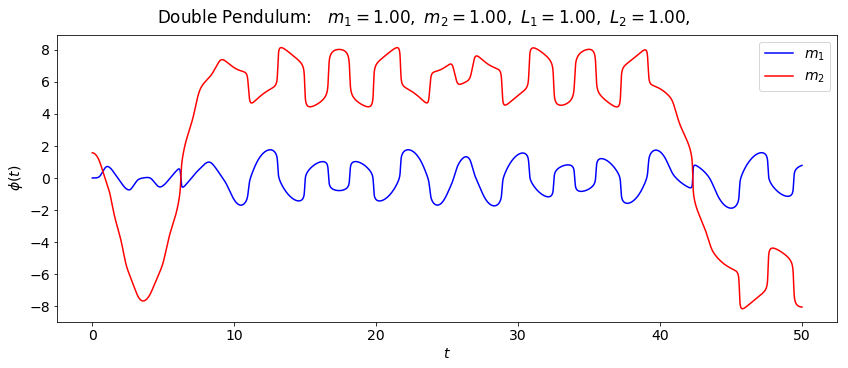

In [29]:
# start the plot!
fig = plt.figure(figsize=(12,5))
overall_title = 'Double Pendulum:  ' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f},$' + \
                rf' $L_1 = {L1:.2f},$' + \
                rf' $L_2 = {L2:.2f},$'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 50.)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label= '$m_1$', 
            title=None,
            ax=ax_a)                 

start, stop = start_stop_indices(t_pts, 0., 50.)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label='$m_2$', 
            title=None, 
            ax=ax_a)

fig.tight_layout()
fig.savefig('Double_Pendulum.png', dpi = 200, bbox_inches='tight')  # always bbox_inches='tight'

# Showing Chaos
Let's check if our system becomes chaotic once we are beyond the small angle approximation.

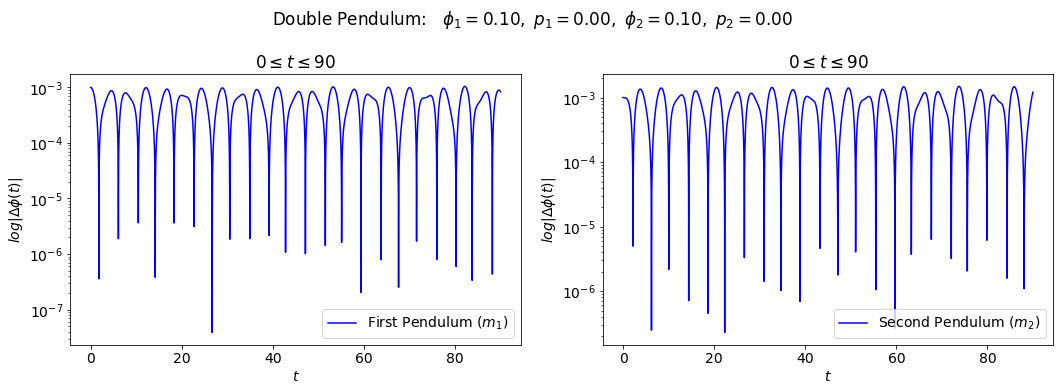

In [8]:
# Labels for individual plot axes
log_phi_vs_time_labels = (r'$t$', r'$log|\Delta\phi(t)|$')

# initial conditions specified
# first pendulum
phi1_0 = 0.1
p_phi1_0 = 0.
phi2_0 = 0.1
p_phi2_0 = 0.
phi1, p_phi1, phi2, p_phi2 = p1.solve_ode(phi1_0, p_phi1_0, phi2_0, p_phi2_0, t_pts)

# second pendulum
phi1_0 = 0.101
p_phi1_0 = 0.
phi2_0 = 0.101
p_phi2_0 = 0.
phi1_2, p_phi1_2, phi2_2, p_phi2_2 = p1.solve_ode(phi1_0, p_phi1_0, phi2_0, p_phi2_0, t_pts)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi1_2 - phi1)
Delta_phi2 = np.fabs(phi2_2-phi2)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double Pendulum:  ' + \
                rf' $\phi_1 = {phi1_0:.2f},$' + \
                rf' $p_1 = {p_phi1_0:.2f},$' + \
                rf' $\phi_2 = {phi2_0:.2f},$' + \
                rf' $p_2 = {p_phi2_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=10   
ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, 0, 90)    
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            axis_labels=log_phi_vs_time_labels, 
            color='blue',
            semilogy = True,
            label='First Pendulum $(m_1)$', 
            title=rf'$0 \leq t \leq 90$', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=7   
ax_b = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, 0, 90)    
plot_y_vs_x(t_pts[start : stop], Delta_phi2[start : stop], 
            axis_labels=log_phi_vs_time_labels, 
            color='blue',
            semilogy = True,
            label='Second Pendulum $(m_2)$', 
            title=rf'$0 \leq t \leq 90$', 
            ax=ax_b)   
  
fig.tight_layout()
fig.savefig('Double_Pendulum_Periodic.png', dpi = 200, bbox_inches='tight')  # always bbox_inches='tight'

Now to look at when we are beyond the small angle approximation.

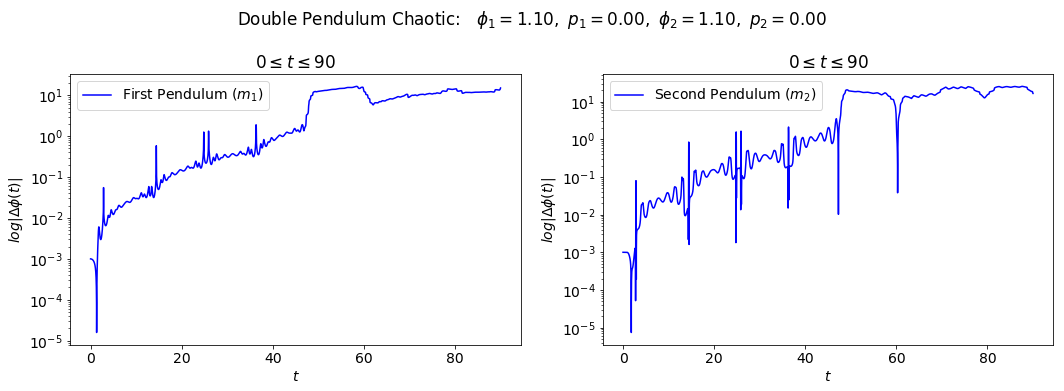

In [9]:
# Labels for individual plot axes
log_phi_vs_time_labels = (r'$t$', r'$log|\Delta\phi(t)|$')

# initial conditions specified
phi1_0 = 1.1
p_phi1_0 = 0.
phi2_0 = 1.1
p_phi2_0 = 0.
phi1, p_phi1, phi2, p_phi2 = p1.solve_ode(phi1_0, p_phi1_0, phi2_0, p_phi2_0, t_pts)
phi1_0 = 1.101
p_phi1_0 = 0.
phi2_0 = 1.101
p_phi2_0 = 0.
phi1_2, p_phi1_2, phi2_2, p_phi2_2 = p1.solve_ode(phi1_0, p_phi1_0, phi2_0, p_phi2_0, t_pts)
# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi1_2 - phi1)
Delta_phi2 = np.fabs(phi2_2 - phi2)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double Pendulum Chaotic:  ' + \
                rf' $\phi_1 = {phi1_0:.2f},$' + \
                rf' $p_1 = {p_phi1_0:.2f},$' + \
                rf' $\phi_2 = {phi2_0:.2f},$' + \
                rf' $p_2 = {p_phi2_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=10   
ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, 0, 90)    
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            axis_labels=log_phi_vs_time_labels, 
            color='blue',
            semilogy = True,
            label='First Pendulum $(m_1)$', 
            title=rf'$0 \leq t \leq 90$', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=7   
ax_b = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, 0, 90)    
plot_y_vs_x(t_pts[start : stop], Delta_phi2[start : stop], 
            axis_labels=log_phi_vs_time_labels, 
            color='blue',
            semilogy = True,
            label='Second Pendulum $(m_2)$', 
            title=rf'$0 \leq t \leq 90$', 
            ax=ax_b)   
  
fig.tight_layout()
fig.savefig('Double_Pendulum_Chaotic.png', dpi = 200, bbox_inches='tight')  # always bbox_inches='tight'

In [11]:
class AnimationPendulumPlot():
    """
    AnimationPlot class uses matplotlib.animation.FuncAnimation to animate
     the dynamics of an oscillator.  This includes a simple time dependence
     graph, a state space graph with Poincare map, and a physical model.
     
     We'll start with a pendulum and then generalize later.
     
    Parameters
    ----------
    phi_vs_t : boolean
        If True, plot phi(t) vs. t
    
    phi_dot_vs_t : boolean
        If True, plot phi_dot(t) vs. t
    
    state_space : boolean
        If True, plot phi_dot(t) s. phi(t)
    
    physics_pend : boolean
        If True, draw the pendulum at phi(t) vs. t


    Methods
    -------
    plot_setup
    
    t_pts_init
    
    add_pendulum
    
    animate_pendulum
    
    plot_setup
    
    start_animation
    """
    def __init__(self, phi_vs_t=True, phi_dot_vs_t=False,
                 state_space=True, physical_pend=True):
        self.phi_list = []
        self.phi_dot_list = []
        self.length = 0.8
        self.line_colors = ['blue', 'red']
        self.pt_colors = ['black', 'brown']
        self.phi_align = ['left', 'right']
                  
    def t_pts_init(self, t_start=0., t_end=100., delta_t=0.01): 
        """Create the array of time points for the full iteration"""
        self.t_start = t_start
        self.t_end = t_end
        self.delta_t = delta_t
        self.t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

    def add_pendulum(self, pend, phi1_0=0., phi1_dot_0=0., phi2_0, p_phi2_0):
        """Add a pendulum to be plotted as a class instance of Pendulum
            along with initial conditions.  So it knows all of the parameters
            as well through the Pendulum class.
        """
        self.pend = pend
        phi, phi_dot = pend.solve_ode(self.t_pts, phi1_0, phi1_dot_0, phi2_0, p_phi2_0)
        self.phi_list.append(phi1)
        self.phi_dot_list.append(ph12_dot)
        self.phi_list.append(phi2)
        self.phi_dot_list.append(phi2_dot)
    
    def plot_setup(self, plot_start, plot_end):
        """Set up the plots to be displayed. """

            # start the plot!
#         overall_title = 'Parameters:  ' + \
#                         rf' $\omega = {omega_ext:.2f},$' + \
#                         rf' $\gamma = {gamma_ext:.3f},$' + \
#                         rf' $\omega_0 = {omega_0:.2f},$' + \
#                         rf' $\beta = {beta:.2f},$' + \
#                         rf'  $\phi_0 = {phi_0:.2f},$' + \
#                         rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
#                         '\n'     # \n means a new line (adds some space here)
#         self.fig = plt.figure(figsize=(10,3.3), num='Pendulum Plots')
#         self.fig.suptitle(overall_title, va='top')

        # Labels for individual plot axes
        phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
        phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
        state_space_labels = (r'$\phi$', r'$d\phi/dt$')
        
        self.fig = plt.figure(figsize=(10, 3.3), num='Pendulum animation')

        self.ax_1 = self.fig.add_subplot(1,3,1)        
        self.ax_1.set_xlabel(r'$t$')
        self.ax_1.set_ylabel(r'$\phi(t)$')
        self.line_1 = []
        self.pt_1 = []

        self.ax_2 = self.fig.add_subplot(1,3,2, projection='polar')
        self.ax_2.set_aspect(1)   # aspect ratio 1 subplot
        self.ax_2.set_rorigin(0.)   # origin in the middle
        self.ax_2.set_theta_zero_location('S')  # phi=0 at the bottom
        self.ax_2.set_ylim(-1.,1.)  # r goes from 0 to 1
        self.ax_2.grid(False)   # no longitude/lattitude lines
        self.ax_2.set_xticklabels([])   # turn off angle labels
        self.ax_2.set_yticklabels([])    # turn off radial labels
        self.ax_2.spines['polar'].set_visible(False) # no circular border
        self.line_2 = []
        self.pt_2 = []
        self.phi_text = []

        self.ax_3 = self.fig.add_subplot(1,3,3)
        self.ax_3.set_xlabel(r'$\phi$')
        self.ax_3.set_ylabel(r'$\dot\phi$')
        self.line_3 = []
        self.pt_3 = []
       
        
        # plot new arrays from start to stop
        self.start, self.stop = start_stop_indices(self.t_pts, plot_start, 
                                                   plot_end)
        self.t_pts_plt = self.t_pts[self.start : self.stop]
        self.phi_plt_list = []
        self.phi_dot_plt_list = []
                                               self.phi_dot_list)):
            phi_plt = phi[self.start : self.stop]
            self.phi_plt_list.append(phi_plt)
            
            phi_dot_plt = phi_dot[self.start : self.stop]
            self.phi_dot_plt_list.append(phi_dot_plt)

            line_1, = self.ax_1.plot(self.t_pts_plt, phi_plt, 
                                      color=self.line_colors[i])
            self.line_1.append(line_1)
            pt_1, = self.ax_1.plot(self.t_pts_plt[0], phi_plt[0], 
                                    'o', color=self.pt_colors[i])
            self.pt_1.append(pt_1)
        
            self.ax_2.plot(0, 0, color='black', marker='o', markersize=5)
            line_2, = self.ax_2.plot([phi_plt[0], phi_plt[0]], 
                                      [0.,self.length], 
                                      color=self.line_colors[i], lw=3)
            self.line_2.append(line_2)
            pt_2, = self.ax_2.plot(phi_plt[0], self.length, 
                                   marker='o', markersize=15, 
                                   color=self.pt_colors[i])
            self.pt_2.append(pt_2)
            phi_string = rf'$\phi = {phi_plt[0]: .1f}$'
            phi_text = self.ax_2.text(np.pi, 1., phi_string, 
                                   horizontalalignment=self.phi_align[i]) 
            self.phi_text.append(phi_text)        
        
            line_3, = self.ax_3.plot(phi_plt, phi_dot_plt, 
                                     color=self.line_colors[i])
            self.line_3.append(line_3)
            pt_3, = self.ax_3.plot(phi_plt[0], phi_dot_plt[0], 
                                    'o', color=self.pt_colors[i])
            self.pt_3.append(pt_3)
        
        self.fig.tight_layout()
        

    def animate_pendulum(self, i, t_pts_skip, phi_skip_list,
                         phi_dot_skip_list):
        for index, (phi_skip, phi_dot_skip) in \
                     enumerate(zip(phi_skip_list, phi_dot_skip_list)):
            self.pt_1[index].set_data(t_pts_skip[i], phi_skip[i])

            self.line_2[index].set_data([phi_skip[i], phi_skip[i]], 
                                        [0., self.length])
            self.pt_2[index].set_data(phi_skip[i], self.length)
            phi_string = rf'$\phi = {phi_skip[i]: .1f}$  '
            self.phi_text[index].set_text(phi_string)

            self.pt_3[index].set_data(phi_skip[i], phi_dot_skip[i])

        #return self.pt_1, self.pt_2, self.phi_text, self.pt_3
          
        
    def start_animation(self, skip=2, interval=25.):
        self.skip = skip          # skip between points in t_pts array
        self.interval = interval  # time between frames in milliseconds
        
        phi_skip_list = []
        phi_dot_skip_list = []
        for i, (phi_plt, phi_dot_plt) in enumerate(zip(self.phi_plt_list, 
                                                       self.phi_dot_plt_list)):
            phi_skip_list.append(phi_plt[::self.skip])
            phi_dot_skip_list.append(phi_dot_plt[::self.skip])
                      
        t_pts_skip = self.t_pts_plt[::self.skip]                                   
        self.anim = animation.FuncAnimation(self.fig, self.animate_pendulum, 
                           fargs=(t_pts_skip,
                                  phi_skip_list, phi_dot_skip_list,
                                 ), 
                           init_func=None,
                           frames=len(t_pts_skip), 
                           interval=self.interval, 
                           blit=False, repeat=False,
                           save_count=0)

        #HTML(anim.to_jshtml())
        self.fig.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 189)

In [ ]:
# [0, L1*np.cos(phi1), L1*np.cos(phi1) L2*np.cos(phi2)]

# Create a pendulum animation instance. 
pendulum_anim = AnimationPendulumPlot(phi_vs_t=True, 
                                      state_space=True,
                                      physical_pend=True)

# Common plotting time (generate the full time here then use slices below)
t_start = 0.
t_end = 100.
delta_t = 0.01
pendulum_anim.t_pts_init(t_start, t_end, delta_t)

# Pendulum parameters
phi1_0 = 0.1
p_phi1_0 = 0.
phi2_0 = 0.1
p_phi2_0 = 0.

# Add a pendulum to the animation plots; this solves the differential
#  equation for the full t_pts array, generating phi and phi_dot internally. 
pendulum_anim.add_pendulum(p1, phi1_0, p_phi1_0, phi2_0, p_phi2_0)

In [ ]:
plot_start = 0.   # time to begin plotting
plot_end = 30.    # time to end plotting
pendulum_anim.plot_setup(plot_start, plot_end)

# Start the animation (adjust skip and interval for a smooth plot at a 
#  useful speed)
skip = 2        # skip between time points (in units of delta_t) 
interval = 15.  # time between frames in milliseconds
pendulum_anim.start_animation(skip, interval)